In [33]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt

tokenizer_gpt2=AutoTokenizer.from_pretrained("gpt2")

In [64]:
#分词效果示例
text_fr="À l'aube, le soleil doré se lève lentement, teintant la mer de tons orangés et rougeâtres. Des vagues blanches viennent doucement lécher le rivage sablonneux, tandis que des mouettes tournoient et crient dans la lumière matinale. Une brise marine fraîche, chargée d'une odeur de sel, effleure le visage, annonçant le début d'une nouvelle journée."
text_en="At dawn, the golden sun rises slowly, painting the sea in shades of orange and red. White waves gently lap against the sandy shore, while seagulls circle and cry in the morning light. A fresh sea breeze carrying the scent of salt brushes against the face, marking the start of a new day."
text_zh="黎明时分，金色的太阳缓缓升起，将海面染成一片橙红。白色的浪花轻轻拍打着沙滩，海鸥在晨光中盘旋鸣叫。清新的海风带着咸味拂过脸庞，新的一天开始了。"

text={
    'fr':text_fr,
    'en':text_en,
    'zh':text_zh
}

re=tokenizer_gpt2.encode(text_en)
print(re)

[2953, 17577, 11, 262, 10861, 4252, 16736, 6364, 11, 12036, 262, 5417, 287, 23787, 286, 10912, 290, 2266, 13, 2635, 9813, 15165, 14779, 1028, 262, 44039, 15191, 11, 981, 384, 363, 724, 82, 9197, 290, 3960, 287, 262, 3329, 1657, 13, 317, 4713, 5417, 28633, 6872, 262, 21212, 286, 8268, 36377, 1028, 262, 1986, 11, 18730, 262, 923, 286, 257, 649, 1110, 13]


In [65]:
tokenizer_gpt2.decode(re)

'At dawn, the golden sun rises slowly, painting the sea in shades of orange and red. White waves gently lap against the sandy shore, while seagulls circle and cry in the morning light. A fresh sea breeze carrying the scent of salt brushes against the face, marking the start of a new day.'

In [66]:
for i in tokenizer_gpt2.tokenize(text_en):
    print(i)

At
Ġdawn
,
Ġthe
Ġgolden
Ġsun
Ġrises
Ġslowly
,
Ġpainting
Ġthe
Ġsea
Ġin
Ġshades
Ġof
Ġorange
Ġand
Ġred
.
ĠWhite
Ġwaves
Ġgently
Ġlap
Ġagainst
Ġthe
Ġsandy
Ġshore
,
Ġwhile
Ġse
ag
ull
s
Ġcircle
Ġand
Ġcry
Ġin
Ġthe
Ġmorning
Ġlight
.
ĠA
Ġfresh
Ġsea
Ġbreeze
Ġcarrying
Ġthe
Ġscent
Ġof
Ġsalt
Ġbrushes
Ġagainst
Ġthe
Ġface
,
Ġmarking
Ġthe
Ġstart
Ġof
Ġa
Ġnew
Ġday
.


In [77]:
def get_token_stats(tokenizer):
    str_stats={}
    token_stats={}
    for (k,v) in text.items():
       str_stats[k]=len(v.split()) if k != 'zh' else len(v)
       token_stats[k]=len(tokenizer.encode(v))
    return str_stats,token_stats

In [78]:
get_token_stats(tokenizer_gpt2)

({'fr': 54, 'en': 53, 'zh': 71}, {'fr': 131, 'en': 63, 'zh': 157})

In [88]:
def draw_bar(str_stats,token_stats):
    fig=plt.figure(figsize=(6,6),dpi=80)
    plt.rcParams['font.sans-serif']=['SimHei']
    plt.rcParams.update({'font.size': 13})
    bar_width=0.1
    base=range(len(str_stats))
    br_str=[x-bar_width for x in base]
    br_token=[x+bar_width for x in base]
    plt.bar(br_str,str_stats.values(),color='g',width=bar_width,label='文本长度')
    plt.bar(br_token,token_stats.values(),color='b',width=bar_width,label='分词长度')
    plt.xticks([r for r in base],str_stats.keys(),fontsize=18)
    plt.legend()
    return fig

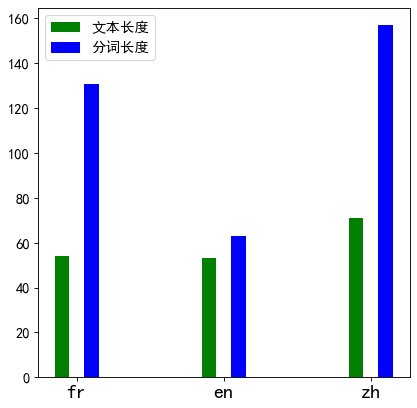

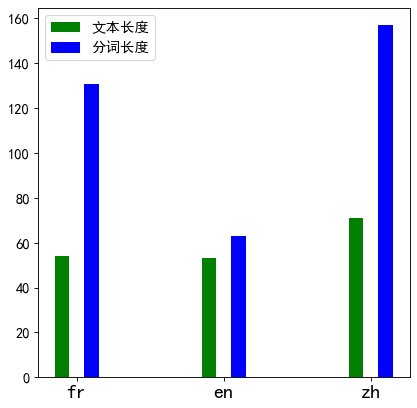

In [89]:
draw_bar(*get_token_stats(tokenizer_gpt2))

In [91]:
from datasets import load_dataset
data=load_dataset("BelleGroup/train_0.5M_CN")
print(data["train"][1])

{'instruction': '给定一个文字输入，将其中的所有数字加1。\n“明天的会议在9点开始，记得准时到达。”\n', 'input': '', 'output': '“明天的会议在10点开始，记得准时到达。”'}


In [93]:
def get_training_corpus():
    d=data["train"].select(range(10000))
    batch_size=1000
    for i in range(0,len(d),batch_size):
        samples=d[i:i+batch_size]
        yield samples.get("instruction",[])

In [95]:
tokenizer_zh=tokenizer_gpt2.train_new_from_iterator(get_training_corpus(),800)
"_".join([tokenizer_zh.decode(i) for i in tokenizer_zh.encode(text_zh)])

'�_�_�_明_时_分_，_�_�_色_的_�_�_�_�_�_�_�_�_�_�_起_，_将_�_�_面_�_�_成_一_�_�_�_�_�_�_�_。_�_�_�_色_的_�_�_�_�_�_�_�_�_�_�_�_�_着_�_�_�_�_�_，_�_�_�_�_�_在_�_�_�_�_中_�_�_�_�_�_�_�_�_�_。_�_�_新_的_�_�_�_�_�_�_着_�_�_�_�_�_�_过_�_�_�_�_�_，_新_的_一_天_开_�_�_了_。'

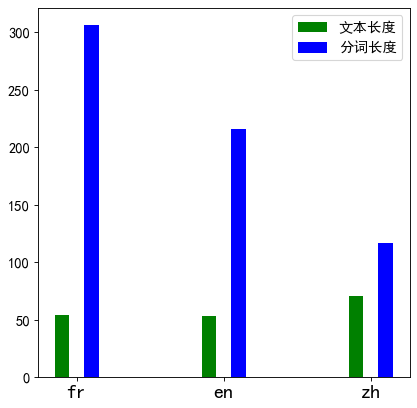

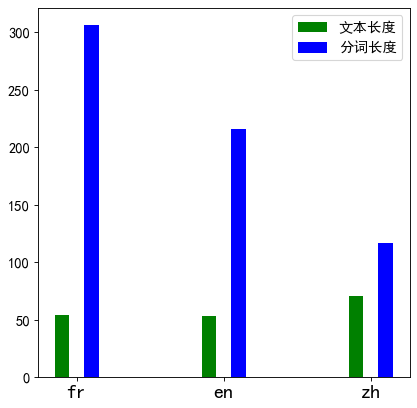

In [96]:
draw_bar(*get_token_stats(tokenizer_zh))